In [70]:
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from scipy.optimize import fsolve
from math import log


In [25]:
X = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]).reshape(-1, 1)

y = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver="saga").fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6666666666666666

In [27]:
new_x = np.array([58]).reshape(-1, 1)

pred_new_x = model.predict_proba(new_x)

pred_new_x[0][1]

np.float64(0.6004935832906764)

In [28]:
def get_threshold(prob):
    logit = log(prob / (1 - prob))
    return (logit - b0) / b1

b0 = model.intercept_[0]
b1 = model.coef_[0][0]

income = get_threshold(0.75)
income

np.float64(152.54410245367643)

# 2

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
df = pd.read_csv("apartments.csv", index_col=False)
df

,area,rooms,age,distance,type
0,132,6,17,10,penthouse
1,209,3,2,7,penthouse
2,122,3,1,9,penthouse
3,44,1,16,4,garden
4,136,3,12,13,penthouse
...,...,...,...,...,...
145,245,4,18,3,garden
146,66,2,25,12,apartment
147,128,1,24,1,studio
148,201,4,13,1,apartment


0.22
              precision    recall  f1-score   support

   apartment       1.00      0.07      0.13        14
      garden       0.17      0.25      0.20         8
   penthouse       0.25      0.50      0.33        12
      studio       0.12      0.09      0.11        11

    accuracy                           0.22        45
   macro avg       0.39      0.23      0.19        45
weighted avg       0.44      0.22      0.19        45



c:\Users\dvica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


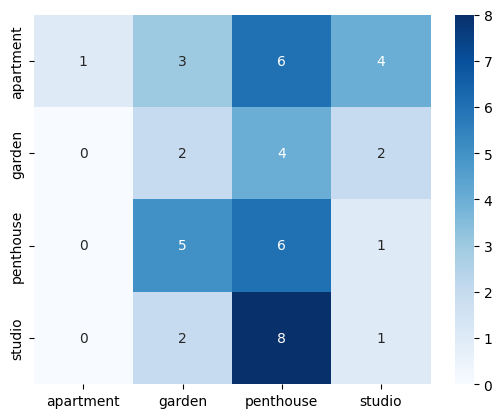

In [78]:
X = df.drop(["type"], axis=1)
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Pipeline([
    ("scayler", StandardScaler()),
    ("logisticReg",LogisticRegressionCV(multi_class="multinomial" ,solver="lbfgs",cv = 5, max_iter=2000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

print(classification_report(y_test, y_pred))

In [77]:
new_prd = np.array([90, 4, 10, 4]).reshape(1, -1)

pre = model.predict(new_prd)
pre[0]

c:\Users\dvica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'penthouse'